# Fbprophet for Coronavirus Data Prediction

In [143]:
# Load EDA pkgs 
import pandas as pd

# load Data Viz Pkgs
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load fbprophet pkg
import fbprophet

In [144]:
# read the dataset
df = pd.read_csv("covid_19_clean.csv")

In [145]:
df.head()

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,Afghanistan,33.93911,67.709953,01-22-20,0,0,0
1,Albania,41.15330,20.168300,01-22-20,0,0,0
2,Algeria,28.03390,1.659600,01-22-20,0,0,0
3,Andorra,42.50630,1.521800,01-22-20,0,0,0
4,Angola,-11.20270,17.873900,01-22-20,0,0,0


In [146]:
df.columns

Index(['Country/Region', 'Lat', 'Long', 'Date', 'Confirmed', 'Deaths',
       'Recovered'],
      dtype='object')

In [147]:
# number of cases per day
df_per_day = df.groupby(['Date'])[['Confirmed','Deaths','Recovered']].apply(sum)

In [148]:
df_per_day

,Confirmed,Deaths,Recovered
Date,,,
01-22-20,555,17,28
01-23-20,654,18,30
01-24-20,941,26,36
01-25-20,1434,42,39
01-26-20,2118,56,52
...,...,...,...
07-20-20,14713623,610319,8190777
07-21-20,14947078,616543,8364986
07-22-20,15227725,623526,8541255


In [149]:
df_per_day.describe()

,Confirmed,Deaths,Recovered
count,1.850000e+02,185.000000,1.850000e+02
mean,4.210261e+06,223987.421622,1.948583e+06
std,4.544628e+06,212997.659647,2.479904e+06
min,5.550000e+02,17.000000,2.800000e+01
25%,1.092540e+05,3797.000000,5.909200e+04
50%,2.718459e+06,194727.000000,7.216890e+05
75%,7.096544e+06,407314.000000,3.235640e+06
max,1.573575e+07,639636.000000,8.939705e+06


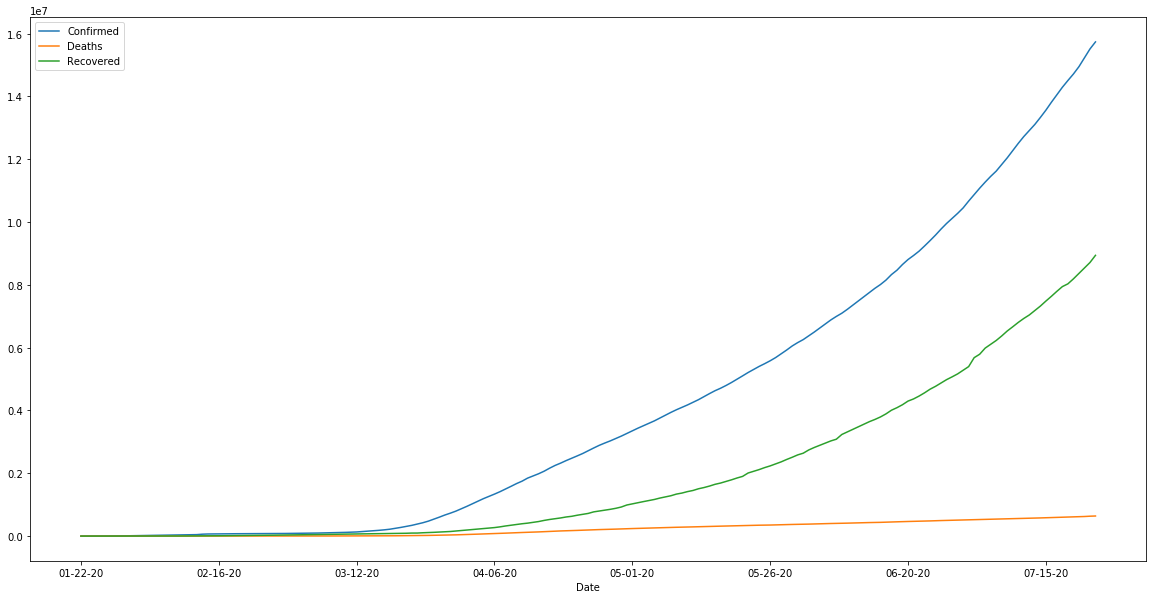

In [150]:
df_per_day.plot(kind='line',figsize=(20,10))

In [151]:
dir(fbprophet)

['Prophet',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'diagnostics',
 'forecaster',
 'hdays',
 'make_holidays',
 'models',
 'plot']

In [152]:
# model initialize 
from fbprophet import Prophet
m = Prophet()

In [153]:
# add the seasonality 
m.add_seasonality(name="monthly", period=30.5, fourier_order=5)

In [154]:
# reset index 
global_cases = df_per_day.reset_index()

In [155]:
global_cases.head()

,Date,Confirmed,Deaths,Recovered
0,01-22-20,555,17,28
1,01-23-20,654,18,30
2,01-24-20,941,26,36
3,01-25-20,1434,42,39
4,01-26-20,2118,56,52


In [156]:
confirmed_cases = global_cases[["Date","Confirmed"]]
recovered_cases = global_cases[["Date","Recovered"]]

In [157]:
confirmed_cases.shape

(185, 2)

In [158]:
# change the column name to ds & y for fbprophet
confirmed_cases.rename(columns={"Date":"ds","Confirmed":"y"}, inplace=True)

D:\Anaconda\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [159]:
# split in train
train = confirmed_cases[:135]

In [160]:
train.shape

(135, 2)

In [161]:
# split in test
test = confirmed_cases[135:]

In [162]:
test.shape

(50, 2)

In [163]:
train.head()

,ds,y
0,01-22-20,555
1,01-23-20,654
2,01-24-20,941
3,01-25-20,1434
4,01-26-20,2118


In [164]:
test.head()

,ds,y
135,06-05-20,6754862
136,06-06-20,6882060
137,06-07-20,6994319
138,06-08-20,7096544
139,06-09-20,7220886


In [166]:
# Fit Model
m.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [167]:
# Future Dates
future_dates = m1.make_future_dataframe(periods=60)

In [168]:
future_dates

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
240,2020-09-18
241,2020-09-19
242,2020-09-20
243,2020-09-21


In [169]:
# prediction 
prediction = m1.predict(future_dates)

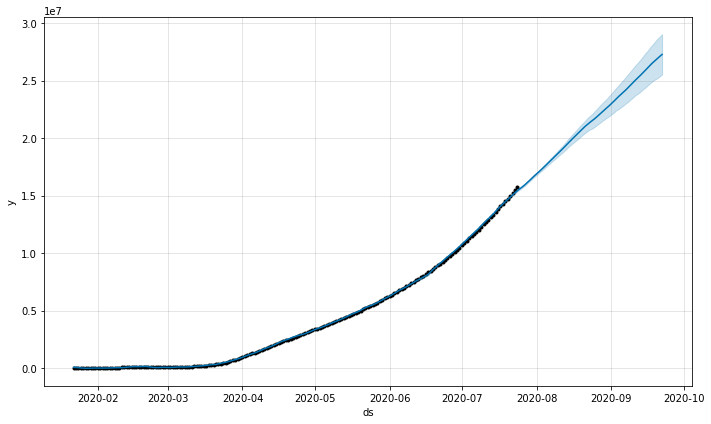

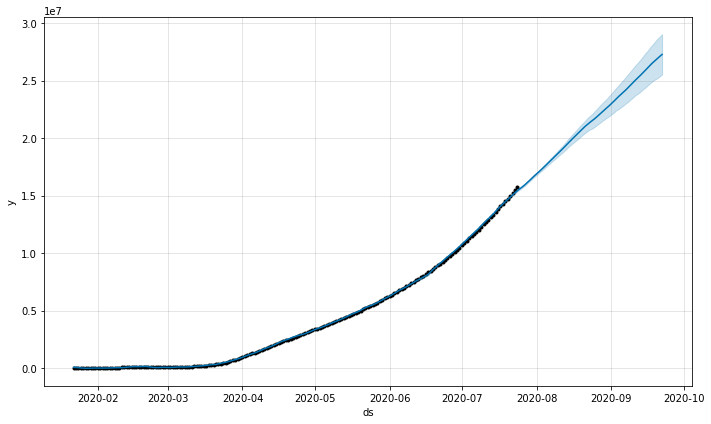

In [170]:
# plot prediction
m1.plot(prediction)

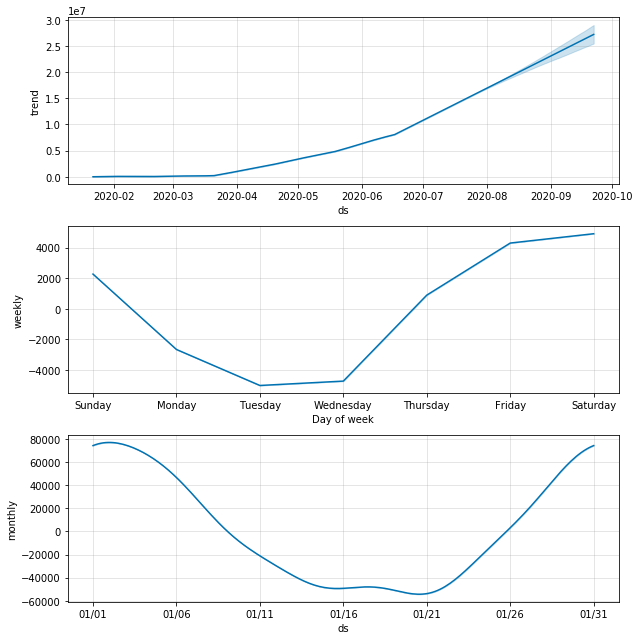

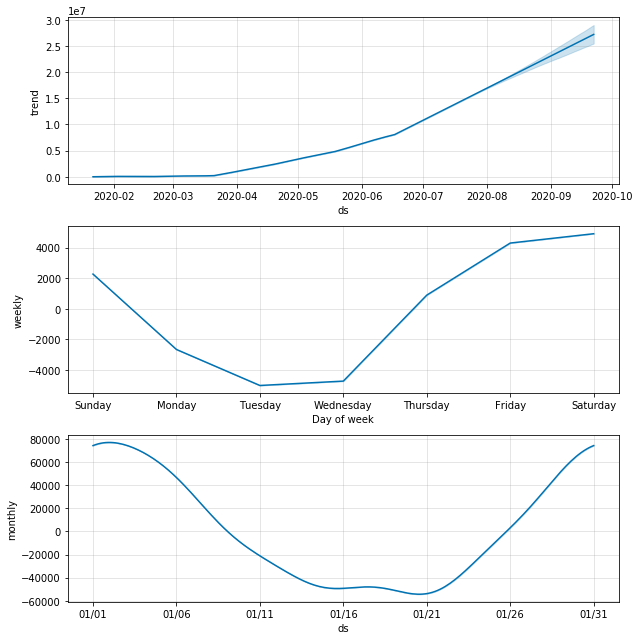

In [171]:
m.plot_components(prediction)

In [172]:
test

,ds,y
135,06-05-20,6754862
136,06-06-20,6882060
137,06-07-20,6994319
138,06-08-20,7096544
139,06-09-20,7220886
140,06-10-20,7354911
141,06-11-20,7493025
142,06-12-20,7622119
143,06-13-20,7756456
144,06-14-20,7889877


In [173]:
test['dates'] = pd.to_datetime(test['ds'])

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [174]:
test

,ds,y,dates
135,06-05-20,6754862,2020-06-05
136,06-06-20,6882060,2020-06-06
137,06-07-20,6994319,2020-06-07
138,06-08-20,7096544,2020-06-08
139,06-09-20,7220886,2020-06-09
140,06-10-20,7354911,2020-06-10
141,06-11-20,7493025,2020-06-11
142,06-12-20,7622119,2020-06-12
143,06-13-20,7756456,2020-06-13
144,06-14-20,7889877,2020-06-14


In [175]:
test = test.set_index("dates")

In [176]:
test

,ds,y
dates,,
2020-06-05,06-05-20,6754862
2020-06-06,06-06-20,6882060
2020-06-07,06-07-20,6994319
2020-06-08,06-08-20,7096544
2020-06-09,06-09-20,7220886
2020-06-10,06-10-20,7354911
2020-06-11,06-11-20,7493025
2020-06-12,06-12-20,7622119
2020-06-13,06-13-20,7756456


In [177]:
test = test['y']

In [178]:
test

dates
2020-06-05     6754862
2020-06-06     6882060
2020-06-07     6994319
2020-06-08     7096544
2020-06-09     7220886
2020-06-10     7354911
2020-06-11     7493025
2020-06-12     7622119
2020-06-13     7756456
2020-06-14     7889877
2020-06-15     8009515
2020-06-16     8150918
2020-06-17     8327050
2020-06-18     8466978
2020-06-19     8647784
2020-06-20     8805336
2020-06-21     8933875
2020-06-22     9071733
2020-06-23     9237071
2020-06-24     9408254
2020-06-25     9586141
2020-06-26     9777487
2020-06-27     9955597
2020-06-28    10117227
2020-06-29    10275799
2020-06-30    10449697
2020-07-01    10667386
2020-07-02    10875091
2020-07-03    11078585
2020-07-04    11272152
2020-07-05    11454847
2020-07-06    11622190
2020-07-07    11833034
2020-07-08    12044836
2020-07-09    12273063
2020-07-10    12505640
2020-07-11    12721968
2020-07-12    12914636
2020-07-13    13107415
2020-07-14    13328867
2020-07-15    13559984
2020-07-16    13812525
2020-07-17    14054563
2020-

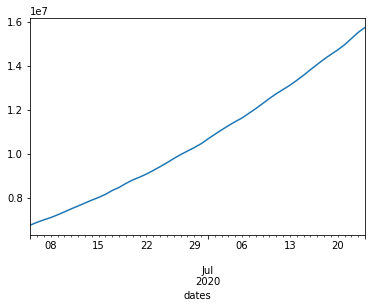

In [179]:
test.plot()

In [180]:
# find point/date for change
from fbprophet.plot import add_changepoints_to_plot

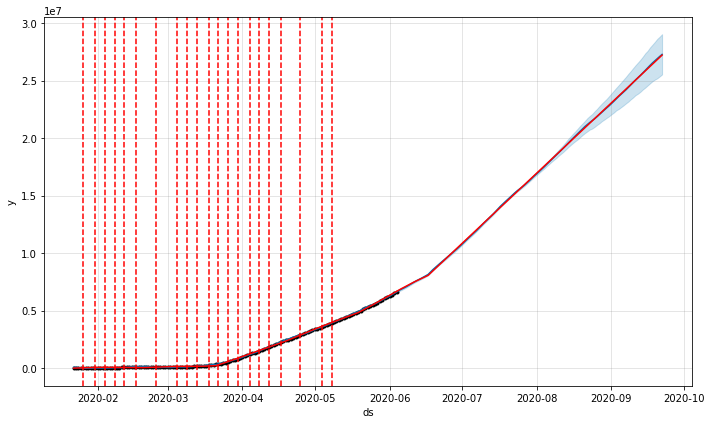

In [181]:
fig = m.plot(prediction)
c = add_changepoints_to_plot(fig.gca(),m,prediction)

In [188]:
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics

In [224]:
df_cv = cross_validation(m, horizon='30 days')

INFO:fbprophet:Making 1 forecasts with cutoffs between 2020-05-05 00:00:00 and 2020-05-05 00:00:00


In [225]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-05-06,3.748270e+06,3.744408e+06,3.752056e+06,3758554,2020-05-05
1,2020-05-07,3.830395e+06,3.825791e+06,3.834917e+06,3847640,2020-05-05
2,2020-05-08,3.913322e+06,3.906251e+06,3.920615e+06,3939157,2020-05-05
3,2020-05-09,3.995597e+06,3.985345e+06,4.006816e+06,4022792,2020-05-05
4,2020-05-10,4.078190e+06,4.061914e+06,4.093971e+06,4099038,2020-05-05


In [226]:
df_p = performance_metrics(df_cv)

In [227]:
df_p

,horizon,mse,rmse,mae,mape,mdape,coverage
0,3 days,3.568581e+08,18890.688699,17787.777180,0.004592,0.004482,0.000000
1,4 days,5.681382e+08,23835.648861,23425.078439,0.005934,0.006558,0.000000
2,5 days,6.138887e+08,24776.776588,24626.084072,0.006135,0.006558,0.000000
3,6 days,4.901211e+08,22138.678652,21750.630328,0.005323,0.005086,0.333333
4,7 days,3.756824e+08,19382.529162,19321.041711,0.004627,0.004674,0.666667
5,8 days,4.015247e+08,20038.081493,19915.396039,0.004669,0.004674,1.000000
6,9 days,7.386578e+08,27178.259202,26232.547937,0.006009,0.005210,1.000000
7,10 days,1.393550e+09,37330.279153,35793.535526,0.008021,0.008143,1.000000
8,11 days,2.330223e+09,48272.387779,47462.598696,0.010435,0.010709,1.000000
9,12 days,2.862048e+09,53498.109328,53369.190026,0.011536,0.011446,1.000000


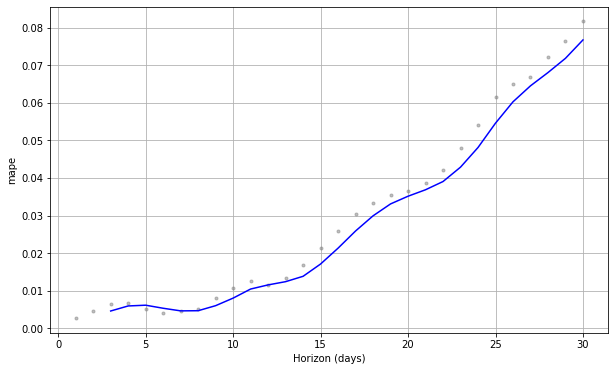

In [228]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')